<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/popolazioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_excel('/content/germany.xlsx')

In [ ]:
df.head()

,Gender,RegionGermany,PunchRegionGermany,EducationGermany,PoliticsGermany,Q2,Q3,Q4,Q5,Q6,...,Q18_23,Q19,Q20,Q21,Q22,Q23,Income,lft,Lftcat,Edu
0,Male,Sachsen-Anhalt,Eastern Germany,Fachhochschule,Die Linke,5,1,No,1,Myself,...,5,Car manufacturer(s),3,3,1 person,No people,€35.000 - €49.999,61,55 t/m 70,High
1,Male,Niedersachsen,North Germany,"Fachoberschule, Fachschule, Berufsschule, Beru...",AlternativeFar Deutschland (AfD),1,2,No,1,Equally shared in decision makings,...,2,Car dealer(s),3,3,2 people,No people,€20.000 - €34.999,69,55 t/m 70,Middle
2,Female,Nordrhein-Westfalen,Western Germany,Realschule,Sozialdemokratische Partei Deutschlands (SPD),1,2,No,1,Myself,...,4,Car manufacturer(s),4,1,1 person,No people,€20.000 - €34.999,46,45 t/m 54,Middle
3,Female,Nordrhein-Westfalen,Western Germany,Realschule,No party,5,1,I don't know,1,Equally shared in decision makings,...,99999997,Car dealer(s),3,3,2 people,No people,€20.000 - €34.999,68,55 t/m 70,Middle
4,Female,Rheinland-Pfalz,Western Germany,"Fachoberschule, Fachschule, Berufsschule, Beru...",Christlich Demokratische Union Deutschlands (CDU),2,2,No,1,Equally shared in decision makings,...,99999997,"Newsarticles (newspapers, tv and websites)",3,3,2 people,2 people,€20.000 - €34.999,34,25 t/m 34,Middle


In [ ]:
#  mapping dictionary
mapping = {'If I had an EV, it would be my only car': 1, 'If I had an EV, it would be a supplement to a petrol or diesel car': 1, 'I would never buy an EV': 0, "I don't know": 0}

# Apply the mapping to the target variable
df['Q16'] = df['Q16'].map(mapping)

In [ ]:
income_mapping = {
    '€19.999 or less': 'low',
    '€20.000 - €34.999': 'lower middle',
    '€35.000 - €49.999': 'middle',
    '€50.000 - €64.999': 'higher middle',
    '€65.000 - €79.999': 'higher middle',
    '€80.000 - €94.999': 'high',
    '€95.000 - €109.999': 'high',
    '€110.000 or more': 'high',
    "I'd rather not say": np.nan
}

# Supponendo che la colonna si chiami 'Income'
df['Income_level'] = df['Income'].map(income_mapping)


In [ ]:
socio_columns=['Gender',
 'RegionGermany',
 'EducationGermany',
 'PoliticsGermany','Q22',
 'Q23',
 'Income_level',
 'Lftcat','Q16']
df_socio=df.copy()
df_socio= df[socio_columns]

In [ ]:
education_mapping = {
    'Grundschule': 'Primary',

    'Hauptschule': 'Lower Secondary',
    'Realschule': 'Lower Secondary',

    'Fachoberschule, Fachschule, Berufsschule, Berufsfachschule' : 'Upper Secondary',
    'Gymnasium Berufliches Gymnasium Fachgymnasium, Gesamtschule': 'Upper Secondary',

    'Technische Hochschule, PÃ¤dagogische Hochschule, Kunsthochschule Musikhochschule': 'Tertiary and higher',
    'UniversitÃ¤t, Technische UniversitÃ¤t': 'Tertiary and higher',

    'Fachhochschule': 'Tertiary and higher'
}

# Supponendo che la colonna si chiami 'Education'
df_socio['Education'] = df_socio['EducationGermany'].map(education_mapping)
df_socio = df_socio.drop(columns=['EducationGermany'])

<ipython-input-8-229ba1212652>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socio['Education'] = df_socio['EducationGermany'].map(education_mapping)


In [ ]:
# Dizionario di mapping partiti → schieramento politico

party_mapping = {
    'Christlich Demokratische Union Deutschlands (CDU)': 'center',
    'Christlich-Soziale Union in Bayern (CSU)': 'center',
    'Bündnis 90/Die Grünen' 'Freie Demokratische Partei (FDP)': 'center',
    'AlternativeFar Deutschland (AfD)': 'right',
    'Sozialdemokratische Partei Deutschlands (SPD)': 'left',
    'Bündnis 90/Die Grünen': 'left',
    'Die Linke': 'left'
}

# Applichiamo la mappatura
df_socio['Politics_grouped'] = df_socio['PoliticsGermany'].map(party_mapping)
df_socio = df_socio.dropna(subset=['Politics_grouped'])
df_socio = df_socio.drop(columns=['PoliticsGermany'])

In [ ]:
df_socio.head()

,Gender,RegionGermany,Q22,Q23,Income_level,Lftcat,Q16,Education,Politics_grouped
0,Male,Sachsen-Anhalt,1 person,No people,middle,55 t/m 70,1,Tertiary and higher,left
1,Male,Niedersachsen,2 people,No people,lower middle,55 t/m 70,0,Upper Secondary,right
2,Female,Nordrhein-Westfalen,1 person,No people,lower middle,45 t/m 54,1,Lower Secondary,left
4,Female,Rheinland-Pfalz,2 people,2 people,lower middle,25 t/m 34,0,Upper Secondary,center
5,Male,Nordrhein-Westfalen,2 people,2 people,higher middle,35 t/m 44,1,Upper Secondary,left


In [ ]:

for col in df_socio.columns:
    print(f"Colonna '{col}': {df_socio[col].unique()}")

Colonna 'Gender': ['Male' 'Female']
Colonna 'RegionGermany': ['Sachsen-Anhalt' 'Niedersachsen' 'Nordrhein-Westfalen' 'Rheinland-Pfalz'
 'Baden-WÃ¼rttemberg' 'Hessen' 'Schleswig-Holstein' 'Bayern' 'Sachsen'
 'Hamburg' 'Brandenburg' 'Berlin' 'Mecklenburg-Vorpommern' 'ThÃ¼ringen'
 'Saarland' 'Bremen']
Colonna 'Q22': ['1 person' '2 people' '3 people or more']
Colonna 'Q23': ['No people' '2 people' '1 person' '3 people' '4 people'
 '5 people or more']
Colonna 'Income_level': ['middle' 'lower middle' 'higher middle' 'high' nan 'low']
Colonna 'Lftcat': ['55 t/m 70' '45 t/m 54' '25 t/m 34' '35 t/m 44' '18 t/m 24']
Colonna 'Q16': [1 0]
Colonna 'Education': ['Tertiary and higher' 'Upper Secondary' 'Lower Secondary' 'Primary']
Colonna 'Politics_grouped': ['left' 'right' 'center']


Facciamo one hot encoding di tutte le feature e calcoliamo poi la correlazione (divisa per chi ha Q16=1 e Q16=0)

In [ ]:
# Supponendo che il tuo DataFrame si chiami df

# One-hot encoding per queste colonne
df_socio = pd.get_dummies(df_socio,
                    columns=['Gender',
 'RegionGermany',
 'Education',
 'Politics_grouped','Q22',
 'Q23',
 'Income_level',
 'Lftcat'],
                    prefix=['Gender', 'Region', 'Education','Politics','over18','under18','Income', 'AgeCat'],
                    drop_first=False)


In [ ]:
df_socio= df_socio.astype('int64')

In [ ]:
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1537
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Q16                            1078 non-null   int64
 1   Gender_Female                  1078 non-null   int64
 2   Gender_Male                    1078 non-null   int64
 3   Region_Baden-WÃ¼rttemberg      1078 non-null   int64
 4   Region_Bayern                  1078 non-null   int64
 5   Region_Berlin                  1078 non-null   int64
 6   Region_Brandenburg             1078 non-null   int64
 7   Region_Bremen                  1078 non-null   int64
 8   Region_Hamburg                 1078 non-null   int64
 9   Region_Hessen                  1078 non-null   int64
 10  Region_Mecklenburg-Vorpommern  1078 non-null   int64
 11  Region_Niedersachsen           1078 non-null   int64
 12  Region_Nordrhein-Westfalen     1078 non-null   int64
 13  Region_Rheinland-Pfalz 

In [ ]:
df_socio.to_csv("cleaned_dataset.csv", index=False)

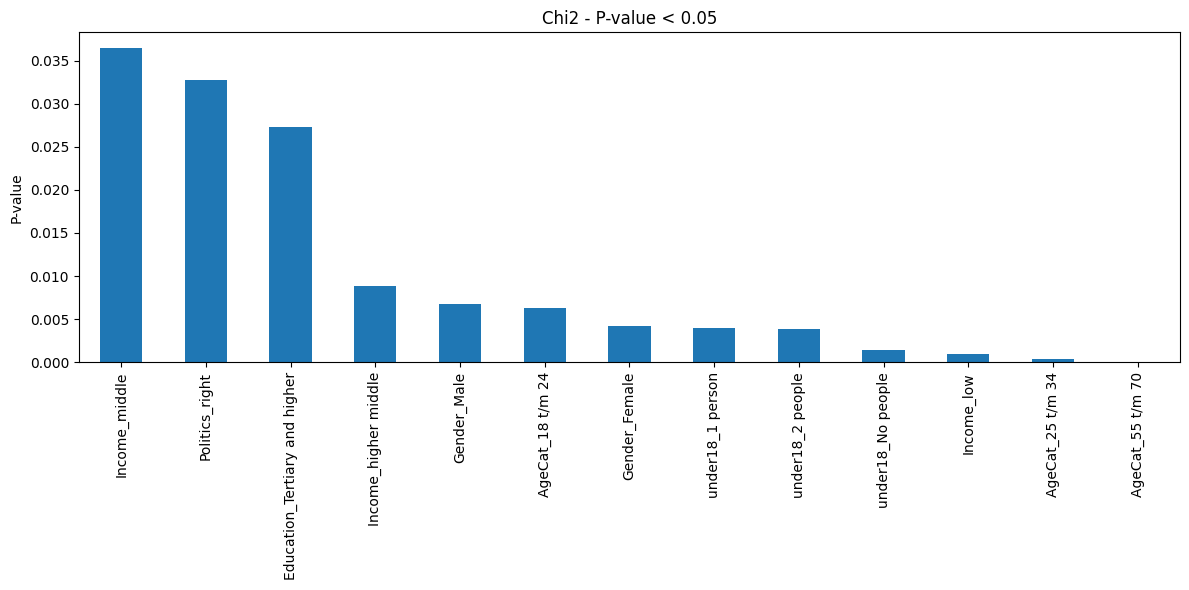

In [ ]:
from sklearn.feature_selection import chi2
y=df_socio['Q16']
X=df_socio.drop('Q16',axis=1)
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
# Filtra solo le feature significative (p-value < 0.05)
significant_p = p_values[p_values < 0.05]

# Visualizzazione
significant_p.plot.bar(figsize=(12, 6), title='Chi2 - P-value < 0.05')
plt.ylabel('P-value')
plt.tight_layout()
plt.show()

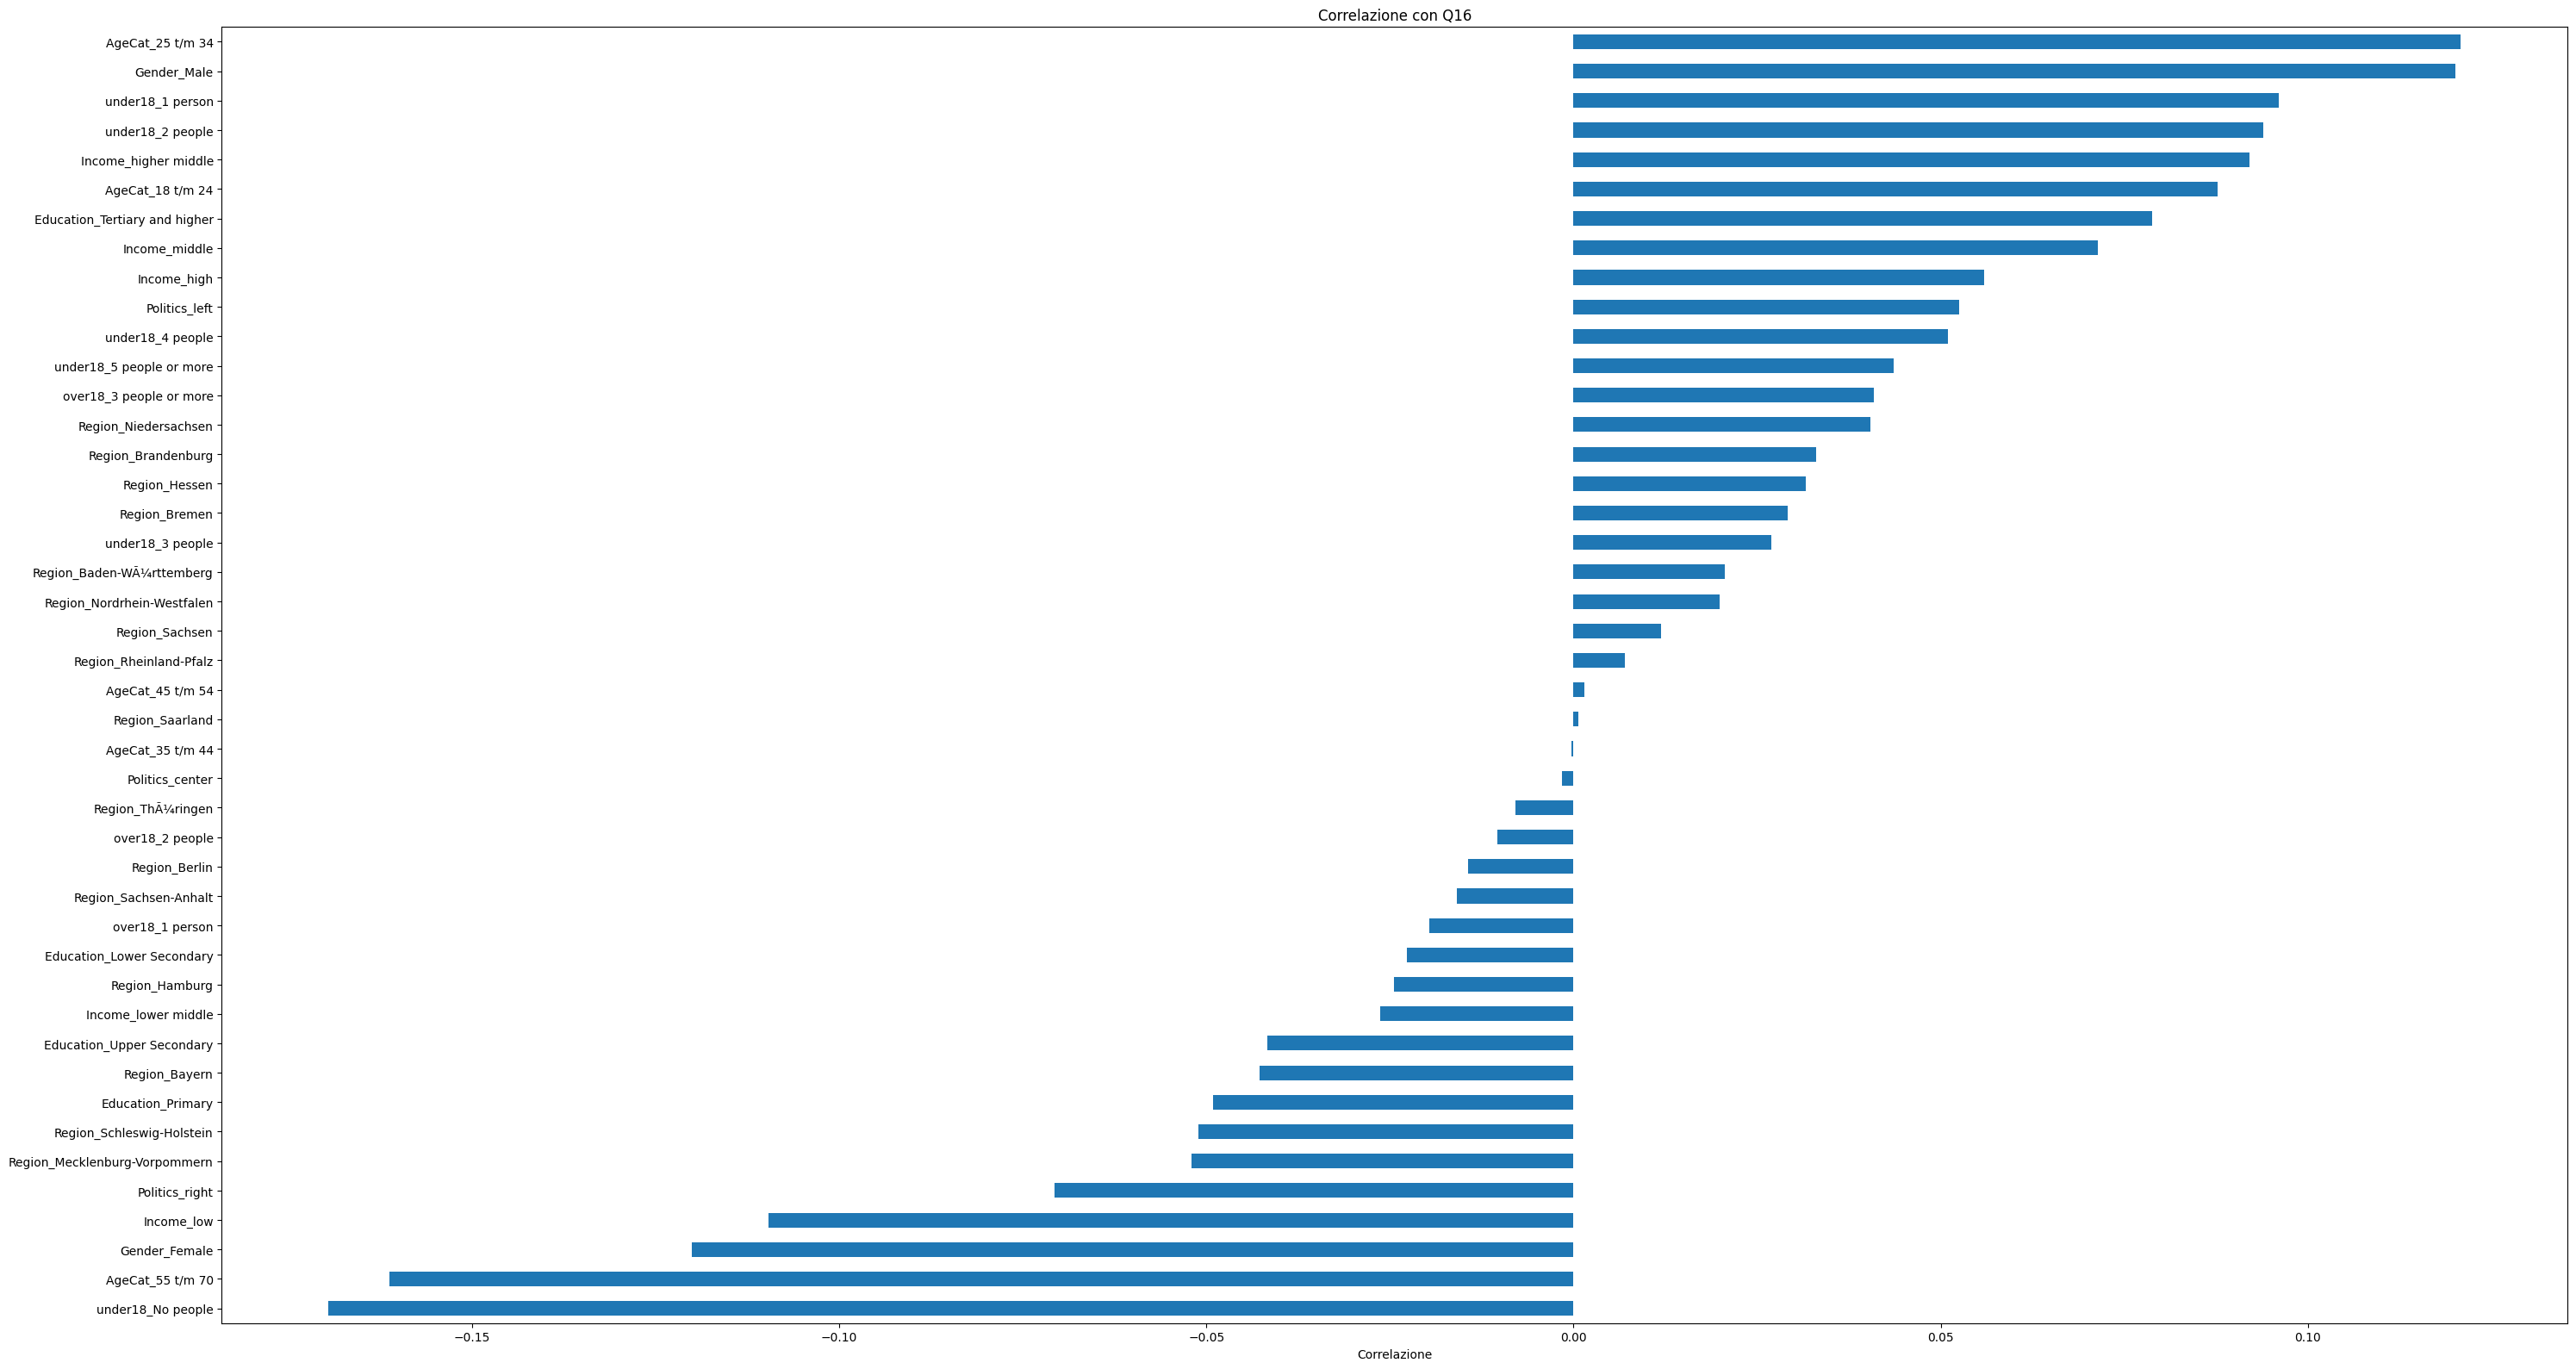


 Variabili più correlate con Q16:
under18_No people               -0.169557
AgeCat_55 t/m 70                -0.161224
AgeCat_25 t/m 34                 0.120825
Gender_Male                      0.120058
Gender_Female                   -0.120058
Income_low                      -0.109687
under18_1 person                 0.096092
under18_2 people                 0.093892
Income_higher middle             0.091998
AgeCat_18 t/m 24                 0.087747
Education_Tertiary and higher    0.078812
Income_middle                    0.071367
Politics_right                  -0.070690
Income_high                      0.055943
Politics_left                    0.052490
Name: Q16, dtype: float64


In [ ]:

# Calcolo della correlazione tra Q16 e tutte le altre variabili binarie
correlations = df.corr(numeric_only=True)['Q16'].drop('Q16').sort_values()

# Visualizza
correlations.plot(kind='barh', figsize=(30, 16), title='Correlazione con Q16')
plt.xlabel('Correlazione')
plt.tight_layout()
plt.show()

# Opzionale: stampare le più forti
print("\n Variabili più correlate con Q16:")

top_correlations = correlations.loc[correlations.abs().sort_values(ascending=False).index[:15]]
print(top_correlations)


In [ ]:
def percentage_q16_for_each_binary_variable(df):
    cols = [col for col in df.columns if col != 'Q16']

    print(f"\n Percentuali di Q16=1 per ciascuna variabile binaria:\n")
    for col in cols:
        subset = df[df[col] == 1]
        if len(subset) == 0:
            continue

        percent_q16 = subset['Q16'].mean()
        print(f"{col}: {percent_q16:.2%} (N={len(subset)})")


In [ ]:

percentage_q16_for_each_binary_variable(df)




 Percentuali di Q16=1 per ciascuna variabile binaria:

Gender_Female: 69.16% (N=509)
Gender_Male: 79.61% (N=569)
Region_Baden-WÃ¼rttemberg: 77.04% (N=135)
Region_Bayern: 70.30% (N=165)
Region_Berlin: 72.13% (N=61)
Region_Brandenburg: 84.00% (N=25)
Region_Bremen: 85.71% (N=14)
Region_Hamburg: 70.18% (N=57)
Region_Hessen: 79.31% (N=87)
Region_Mecklenburg-Vorpommern: 60.00% (N=25)
Region_Niedersachsen: 80.43% (N=92)
Region_Nordrhein-Westfalen: 76.44% (N=208)
Region_Rheinland-Pfalz: 76.19% (N=42)
Region_Saarland: 75.00% (N=8)
Region_Sachsen: 77.08% (N=48)
Region_Sachsen-Anhalt: 70.37% (N=27)
Region_Schleswig-Holstein: 64.71% (N=51)
Region_ThÃ¼ringen: 72.73% (N=33)
Education_Lower Secondary: 73.09% (N=301)
Education_Primary: 50.00% (N=8)
Education_Tertiary and higher: 80.27% (N=294)
Education_Upper Secondary: 72.63% (N=475)
Politics_center: 74.58% (N=358)
Politics_left: 76.90% (N=554)
Politics_right: 67.47% (N=166)
over18_1 person: 73.46% (N=358)
over18_2 people: 74.25% (N=563)
over18_3 pe

In [ ]:
def best_q16_by_category(df):
    categories = {
        'Age': [col for col in df.columns if 'AgeCat' in col],
        'Politics': [col for col in df.columns if 'Politics' in col],
        'Education': [col for col in df.columns if 'Education' in col],
        'Income': [col for col in df.columns if 'Income' in col],
        'MacroRegion': [col for col in df.columns if 'MacroRegion' in col],
        'Over18': [col for col in df.columns if 'over18' in col],
        'Under18': [col for col in df.columns if 'under18' in col],
        'Region': [col for col in df.columns if 'Region_' in col],
        'Gender': [col for col in df.columns if 'Gender_' in col],
    }

    print(" Migliori variabili per % Q16=1 per categoria:\n")

    for cat_name, cat_cols in categories.items():
        best_col = None
        best_pct = -1
        best_n = 0

        for col in cat_cols:
            if col not in df.columns:
                continue
            subset = df[df[col] == 1]
            if len(subset) == 0:
                continue

            pct = subset['Q16'].mean()
            if pct > best_pct:
                best_pct = pct
                best_col = col
                best_n = len(subset)

        if best_col:
            print(f" {cat_name}: {best_col} → {best_pct:.2%} (N={best_n})")
best_q16_by_category(df)


 Migliori variabili per % Q16=1 per categoria:

 Age: AgeCat_18 t/m 24 → 86.11% (N=108)
 Politics: Politics_left → 76.90% (N=554)
 Education: Education_Tertiary and higher → 80.27% (N=294)
 Income: Income_higher middle → 81.65% (N=267)
 Over18: over18_3 people or more → 78.98% (N=157)
 Under18: under18_5 people or more → 100.00% (N=6)
 Region: Region_Bremen → 85.71% (N=14)
 Gender: Gender_Male → 79.61% (N=569)


In [ ]:
def analyze_deviation_with_secondary(primary_prefix, secondary_prefix, min_samples=10, threshold=0.1):
    primary_cols = [col for col in df.columns if col.startswith(primary_prefix)]
    secondary_cols = [col for col in df.columns if col.startswith(secondary_prefix)]

    for primary in primary_cols:
        base_group = df[df[primary] == 1]
        if len(base_group) < min_samples:
            continue

        base_rate = base_group['Q16'].mean()

        print(f"\n Base rate Q16=1 for {primary}: {base_rate:.2f}")

        for secondary in secondary_cols:
            secondary_categories = df[secondary].unique()  # otteniamo tutte le categorie della variabile secondaria

            for category in secondary_categories:
                subset = df[(df[primary] == 1) & (df[secondary] == category)]

                if len(subset) < min_samples:
                    continue

                q16_rate = subset['Q16'].mean()
                deviation = q16_rate - base_rate

                if abs(deviation) >= threshold:
                    print(f"   {primary} & {secondary}={category} → Q16=1: {q16_rate:.2f} (Δ = {deviation:+.2f}, N={len(subset)})")
'''
                    # Grafico
                    plt.bar([f'{secondary}={category}', 'Base'], [q16_rate, base_rate], color=['lightblue', 'lightgray'])
                    plt.title(f'{primary} → Q16=1 deviation by {secondary}={category}')
                    plt.ylabel('Percentuale')
                    plt.ylim(0, 1)
                    plt.tight_layout()
                    plt.show()'''

# Esempio di chiamata
print(" Age + Politics (solo scostamenti significativi, variabile secondaria differenziata)")
analyze_deviation_with_secondary('AgeCat_', 'Politics_', threshold=0.1)




 Age + Politics (solo scostamenti significativi, variabile secondaria differenziata)

 Base rate Q16=1 for AgeCat_18 t/m 24: 0.86

 Base rate Q16=1 for AgeCat_25 t/m 34: 0.86

 Base rate Q16=1 for AgeCat_35 t/m 44: 0.75

 Base rate Q16=1 for AgeCat_45 t/m 54: 0.75
   AgeCat_45 t/m 54 & Politics_right=1 → Q16=1: 0.61 (Δ = -0.14, N=36)

 Base rate Q16=1 for AgeCat_55 t/m 70: 0.64


In [ ]:
analyze_deviation_with_secondary('Income_', 'Politics_')


 Base rate Q16=1 for Income_high: 0.81

 Base rate Q16=1 for Income_higher middle: 0.82

 Base rate Q16=1 for Income_low: 0.63
   Income_low & Politics_right=1 → Q16=1: 0.52 (Δ = -0.11, N=25)

 Base rate Q16=1 for Income_lower middle: 0.72
   Income_lower middle & Politics_right=1 → Q16=1: 0.57 (Δ = -0.15, N=40)

 Base rate Q16=1 for Income_middle: 0.81
   Income_middle & Politics_right=1 → Q16=1: 0.71 (Δ = -0.10, N=34)


In [ ]:
analyze_deviation_with_secondary('AgeCat_', 'Income_')


 Base rate Q16=1 for AgeCat_18 t/m 24: 0.86

 Base rate Q16=1 for AgeCat_25 t/m 34: 0.86

 Base rate Q16=1 for AgeCat_35 t/m 44: 0.75
   AgeCat_35 t/m 44 & Income_low=1 → Q16=1: 0.59 (Δ = -0.16, N=34)

 Base rate Q16=1 for AgeCat_45 t/m 54: 0.75
   AgeCat_45 t/m 54 & Income_low=1 → Q16=1: 0.64 (Δ = -0.11, N=39)

 Base rate Q16=1 for AgeCat_55 t/m 70: 0.64
   AgeCat_55 t/m 70 & Income_low=1 → Q16=1: 0.53 (Δ = -0.11, N=60)
   AgeCat_55 t/m 70 & Income_middle=1 → Q16=1: 0.77 (Δ = +0.13, N=65)


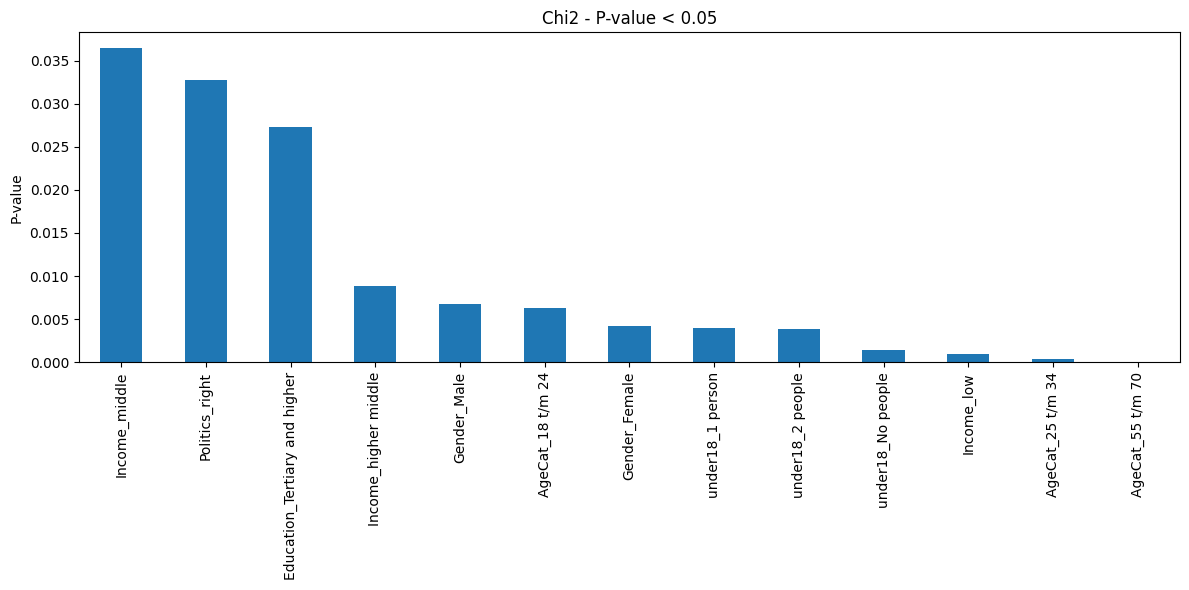

In [ ]:
from sklearn.feature_selection import chi2
y=df['Q16']
X=df.drop('Q16',axis=1)
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
significative = p_values[p_values < 0.05]
significative.plot.bar(figsize=(12, 6), title='Chi2 - P-value < 0.05')
plt.ylabel('P-value')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# STEP 2 — Selezione colonne socio-demografiche
age = [col for col in df.columns if "AgeCat" in col]
education = [col for col in df.columns if "Education" in col]
income = [col for col in df.columns if "Income" in col]
politics = [col for col in df.columns if "Politics" in col]

socio_columns = age + education + income + politics


# STEP 4 — Standardizzazione
# Subset + pulizia
X_socio = df[socio_columns]
# Standardizzazione
scaler = StandardScaler()
X_socio_scaled = scaler.fit_transform(X_socio)



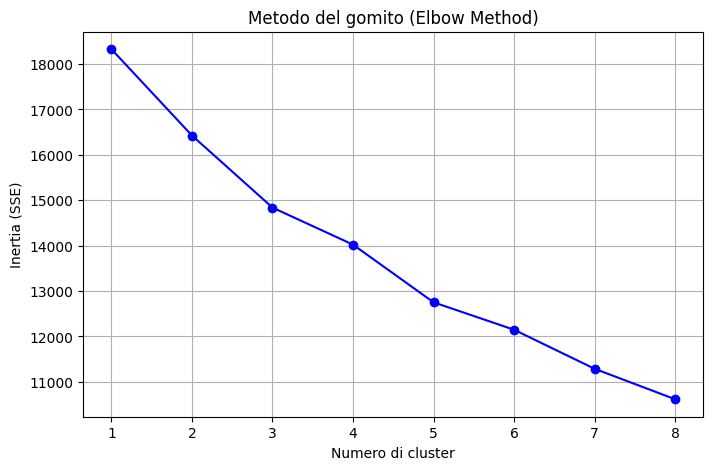

In [ ]:
# Elbow method
inertia = []
k_range = range(1, 9)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_socio_scaled)
    inertia.append(km.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia (SSE)')
plt.title('Metodo del gomito (Elbow Method)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


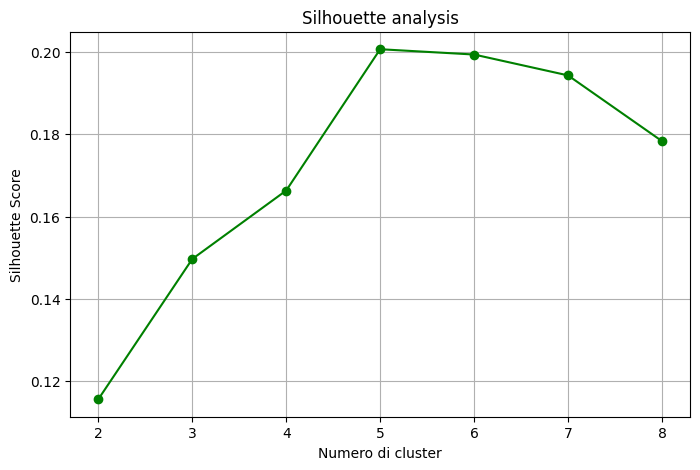

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_socio_scaled)
    score = silhouette_score(X_socio_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), silhouette_scores, 'go-')
plt.xlabel('Numero di cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis')
plt.grid(True)
plt.show()


 Descrizione dei cluster:

Cluster 0: 18 t/m 24 + Upper Secondary + left + center + Lower Secondary
Cluster 1: 45 t/m 54 + Upper Secondary + left + center + Lower Secondary
Cluster 2: 25 t/m 34 + left + Tertiary and higher + Upper Secondary + center
Cluster 3: 55 t/m 70 + left + Upper Secondary + Lower Secondary + center
Cluster 4: 35 t/m 44 + left + Upper Secondary + Tertiary and higher + center


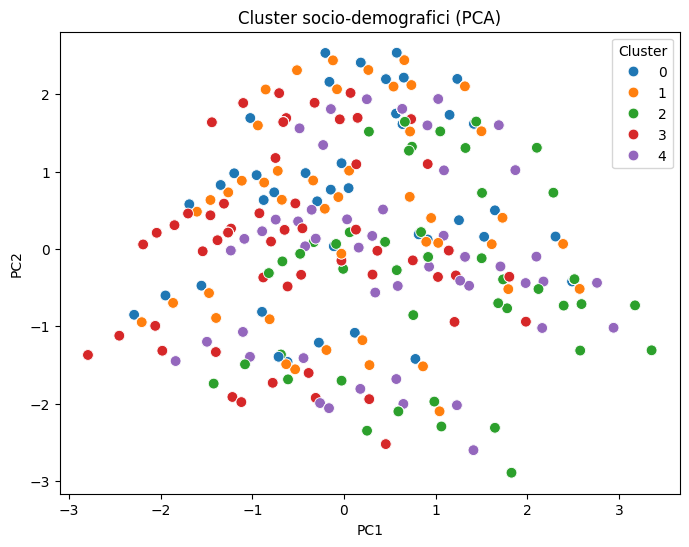

In [ ]:

# STEP 5 — Clustering esclusivo con KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
socio_clusters = kmeans.fit_predict(X_socio_scaled)

# STEP 6 — Unione con dati originali
df_socio = df.loc[X_socio.index].copy()
df_socio['cluster'] = socio_clusters

# STEP 7 — Descrizione automatica dei cluster
def descrizione_cluster(df_clustered, socio_cols):
    descrizioni = {}
    for cluster in sorted(df_clustered['cluster'].unique()):
        gruppo = df_clustered[df_clustered['cluster'] == cluster]
        media = gruppo[socio_cols].mean().sort_values(ascending=False)
        top5 = media.head().index.tolist()
        descrizione = " + ".join([col.split('_')[-1] for col in top5])
        descrizioni[cluster] = f"Cluster {cluster}: {descrizione}"
    return descrizioni

descrizioni = descrizione_cluster(df_socio, socio_columns)
print(" Descrizione dei cluster:\n")
for k, v in descrizioni.items():
    print(v)

# STEP 8 — Visualizzazione 2D con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_socio_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=socio_clusters, palette='tab10', s=60)
plt.title("Cluster socio-demografici (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

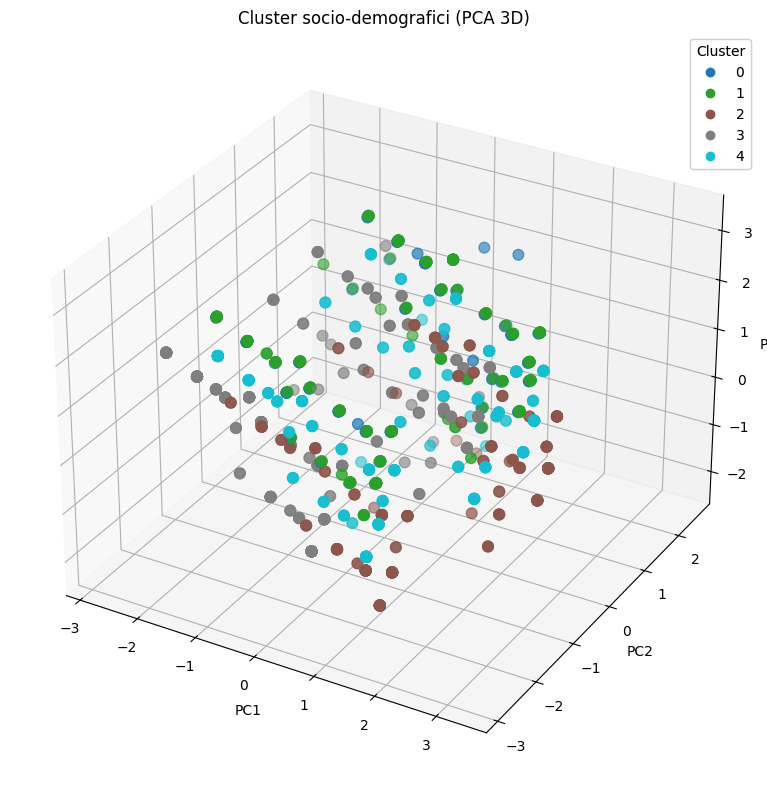

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  #  proiezione 3D

# STEP 8 — PCA 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_socio_scaled)

# Plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=socio_clusters, cmap='tab10', s=60
)

ax.set_title("Cluster socio-demografici (PCA 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")
ax.add_artist(legend)

plt.tight_layout()
plt.show()
